EDA - NLP

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
data = pd.read_csv('data_wrangled_reviews_amazon.csv')

In [3]:
data.head()

,Rating,Rating_Sentiment,Review_Title,Review,Review_str_len,Title_str_len,title_word_tokenize,Review_word_tokenize,title_wtoken_cnt,Review_wtoken_cnt,...,want,watch,way,work,works,worth,written,year,years,likert_scale
0,3,Neutral,more like funchuck,gave this to my dad for a gag gift after direc...,93,18,"['more', 'like', 'funchuck']","['gave', 'this', 'to', 'my', 'dad', 'for', 'a'...",3,24,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,Average
1,5,Positive,inspiring,i hope a lot of people hear this cd. we need m...,204,9,['inspiring'],"['i', 'hope', 'a', 'lot', 'of', 'people', 'hea...",1,44,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,Good
2,5,Positive,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...,470,37,"['the', 'best', 'soundtrack', 'ever', 'to', 'a...","['i', ""'m"", 'reading', 'a', 'lot', 'of', 'revi...",7,101,...,0.0,0.0,0.0,0.0,0.0,0.251830,0.0,0.0,0.240946,Good
3,4,Positive,chrono cross ost,the music of yasunori misuda is without questi...,393,16,"['chrono', 'cross', 'ost']","['the', 'music', 'of', 'yasunori', 'misuda', '...",3,76,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,Above average
4,5,Positive,too good to be true,probably the greatest soundtrack in history! u...,377,19,"['too', 'good', 'to', 'be', 'true']","['probably', 'the', 'greatest', 'soundtrack', ...",5,81,...,0.0,0.0,0.0,0.0,0.0,0.383421,0.0,0.0,0.000000,Good


In [4]:
!pip install wordcloud

In [6]:
from wordcloud import WordCloud

In [17]:
#Creating word Cloud
def showWordCloud(words):
    word_cloud = WordCloud(background_color="white").generate(words)
    plt.imshow(word_cloud)
    plt.show()

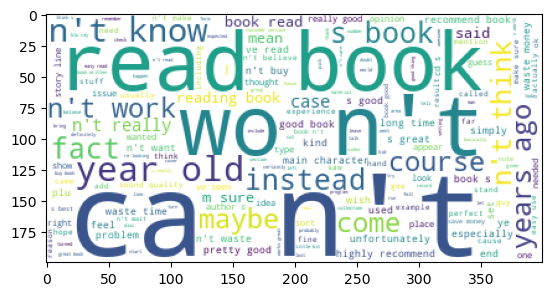

In [18]:
showWordCloud(''.join(data["review_punc_stop_words_removed"].astype(str)))

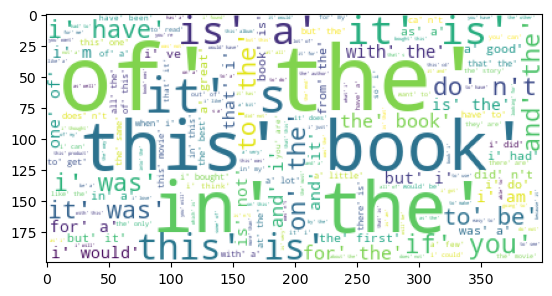

In [20]:
# review Review_word_tokenize
showWordCloud(''.join(data["Review_word_tokenize"].astype(str)))

In [21]:
data.columns

Index(['Rating', 'Rating_Sentiment', 'Review_Title', 'Review',
       'Review_str_len', 'Title_str_len', 'title_word_tokenize',
       'Review_word_tokenize', 'title_wtoken_cnt', 'Review_wtoken_cnt',
       ...
       'want', 'watch', 'way', 'work', 'works', 'worth', 'written', 'year',
       'years', 'likert_scale'],
      dtype='object', length=115)

In [5]:
neutral_rating = data[data["Rating"]==3]

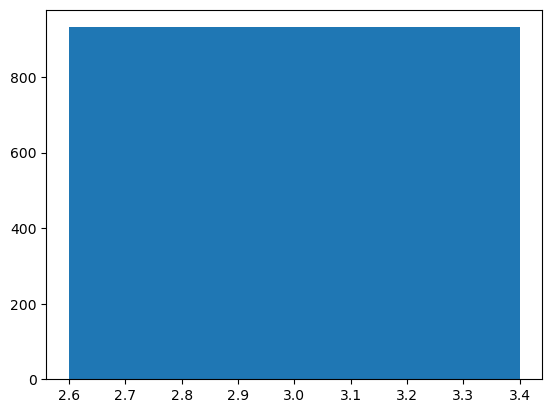

In [6]:
_ = plt.bar(neutral_rating["Rating"], neutral_rating["review_removed_cnt"])
plt.show()

In [7]:
data.groupby('Rating')['Review_wtoken_cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1,600000.0,86.117843,47.628336,1.0,47.0,77.0,118.0,592.0
2,600000.0,92.680263,49.087062,4.0,52.0,85.0,128.0,284.0
3,600000.0,90.495652,50.025043,1.0,48.0,82.0,127.0,400.0
4,600000.0,86.523008,49.802306,1.0,44.0,77.0,122.0,501.0
5,600000.0,78.719663,47.553018,1.0,39.0,67.0,109.0,452.0


In [9]:
# Making a histogram of the Review Count variable.
_ = plt.hist(data['Review_word_tokenize'],bins=5)
_ = plt.xlabel('Word tokenized range')
_ = plt.ylabel('Word tokenized count')
plt.show()

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x104876030>>
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 

KeyboardInterrupt



In [18]:
rating3 = data[data['Rating'] ==3]['Review_wtoken_cnt']
print(rating3.head())

0     24
13    65
15    31
19    66
20    70
Name: Review_wtoken_cnt, dtype: int64


In [19]:
stats_rating3 = stats.normaltest(rating3)
print(stats_rating3)

NormaltestResult(statistic=np.float64(59535.70866559383), pvalue=np.float64(0.0))


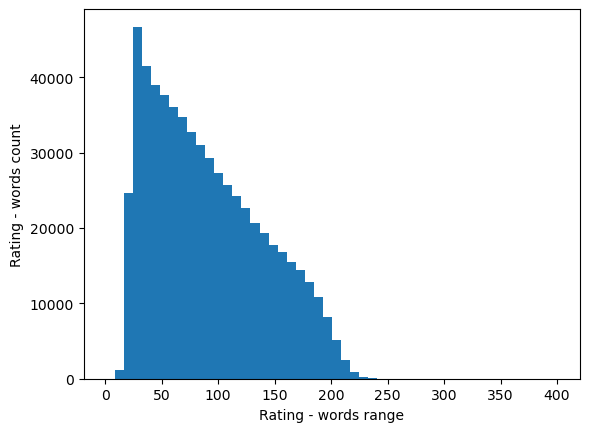

In [27]:
# Making a histogram of the Review Count variable.
_ = plt.hist(data[data['Rating'] ==3]['Review_wtoken_cnt'],bins=50)
_ = plt.xlabel('Rating - words range')
_ = plt.ylabel('Rating - words count')
plt.show()

In [30]:
def hist_matplot(data,bins_range,xlabel,ylabel,title="title"):
    _ = plt.hist(data,bins=bins_range)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    _ = plt.title(title)
    plt.show()

In [41]:
def confidence_interval(data,min,max):
    ci_range = np.percentile(data,[min,max])
    print("ci_range = ",ci_range)

Making a histogram of the Review Count variable for various ratings abnd their ci -range.

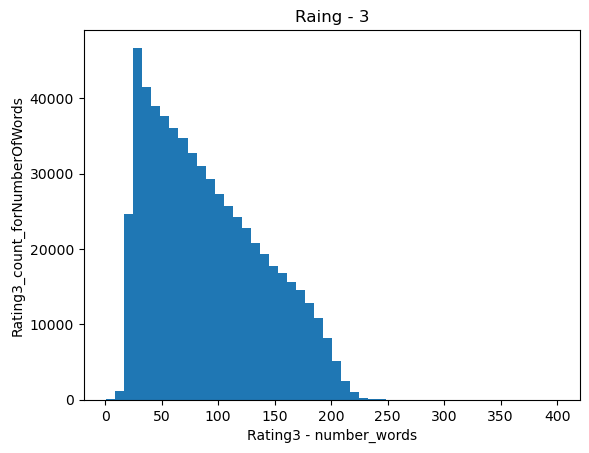

ci_range =  [ 23. 194.]


In [42]:
# rating 3
hist_matplot(data[data['Rating'] ==3]['Review_wtoken_cnt'],50,"Rating3 - number_words","Rating3_count_forNumberOfWords","Raing - 3")
confidence_interval(data[data['Rating'] ==3]['Review_wtoken_cnt'],2.5,97.5)

This shows the most of the Reviews for the Rating 3 are between 23 words and 194 words which is less than 200 words

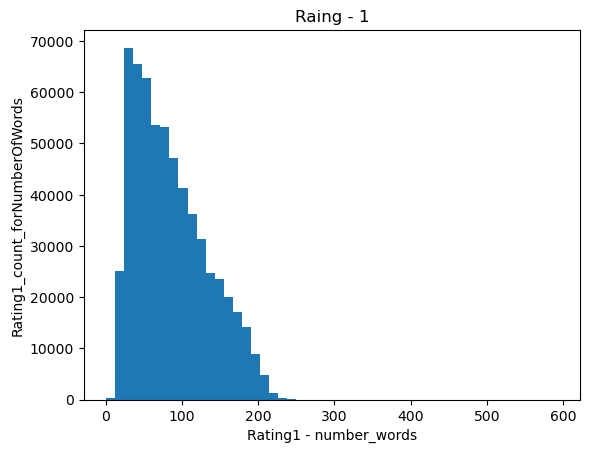

ci_range =  [ 23. 191.]


In [43]:
# rating 1
hist_matplot(data[data['Rating'] ==1]['Review_wtoken_cnt'],50,"Rating1 - number_words","Rating1_count_forNumberOfWords","Raing - 1")
confidence_interval(data[data['Rating'] ==1]['Review_wtoken_cnt'],2.5,97.5)

This shows the most of the Reviews for the Rating 1 are between 23 words and 191 words which is less than 200 words

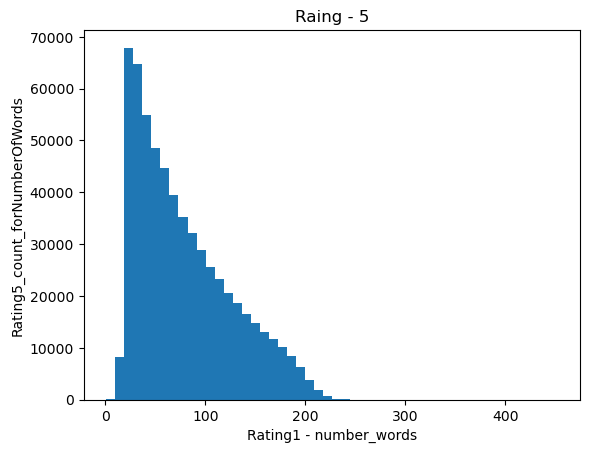

ci_range =  [ 21. 188.]


In [45]:
# rating 5
hist_matplot(data[data['Rating'] ==5]['Review_wtoken_cnt'],50,"Rating5 - number_words","Rating5_count_forNumberOfWords","Raing - 5")
confidence_interval(data[data['Rating'] ==5]['Review_wtoken_cnt'],2.5,97.5)

This shows the most of the Reviews for the Rating 5 are between 21 words and 188 words which is less than 200 words

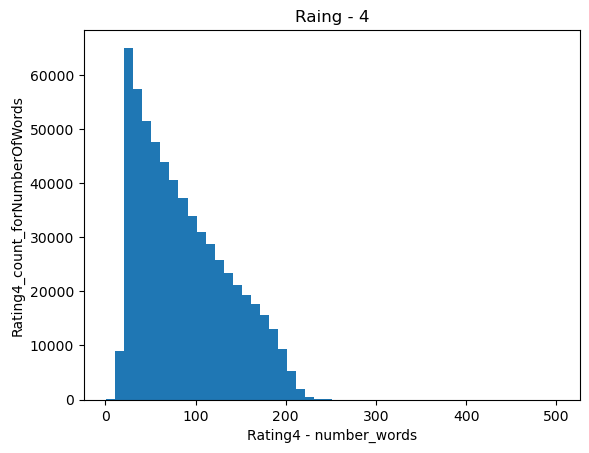

ci_range =  [ 22. 193.]


In [46]:
# rating 4
hist_matplot(data[data['Rating'] ==4]['Review_wtoken_cnt'],50,"Rating4 - number_words","Rating4_count_forNumberOfWords","Raing - 4")
confidence_interval(data[data['Rating'] ==4]['Review_wtoken_cnt'],2.5,97.5)

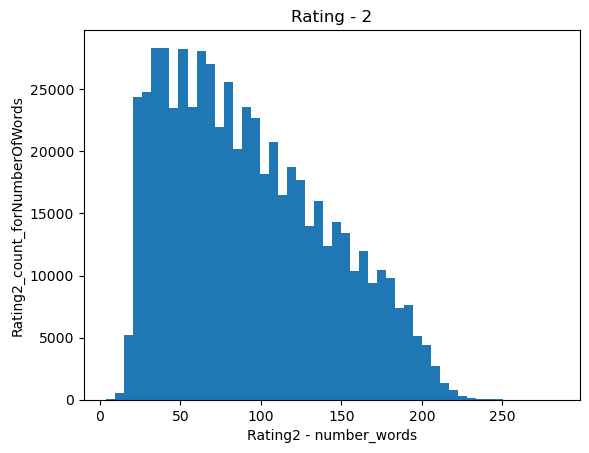

ci_range =  [ 23. 194.]


In [51]:
# rating 2
hist_matplot(data[data['Rating'] ==2]['Review_wtoken_cnt'],50,"Rating2 - number_words","Rating2_count_forNumberOfWords","Rating - 2")
confidence_interval(data[data['Rating'] ==2]['Review_wtoken_cnt'],2.5,97.5)

This shows the most of the Reviews for the Rating 2 are between 23 words and 194 words which is less than 200 words

The minimum words range used in most of the Reviews are between 21 to 194 words

In [56]:
import re
from collections import Counter

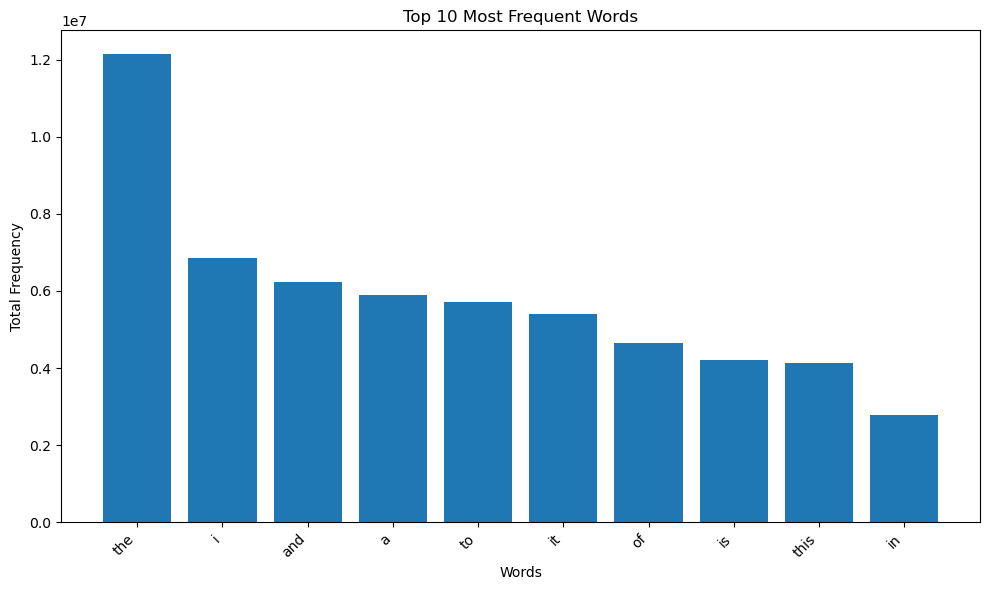

In [57]:
#Bar Chart of Top N Words (based on total frequency)
all_words = []
for text in data['Review_word_tokenize']:
    all_words.extend(re.findall(r'\b\w+\b', text.lower())) # Extract all words

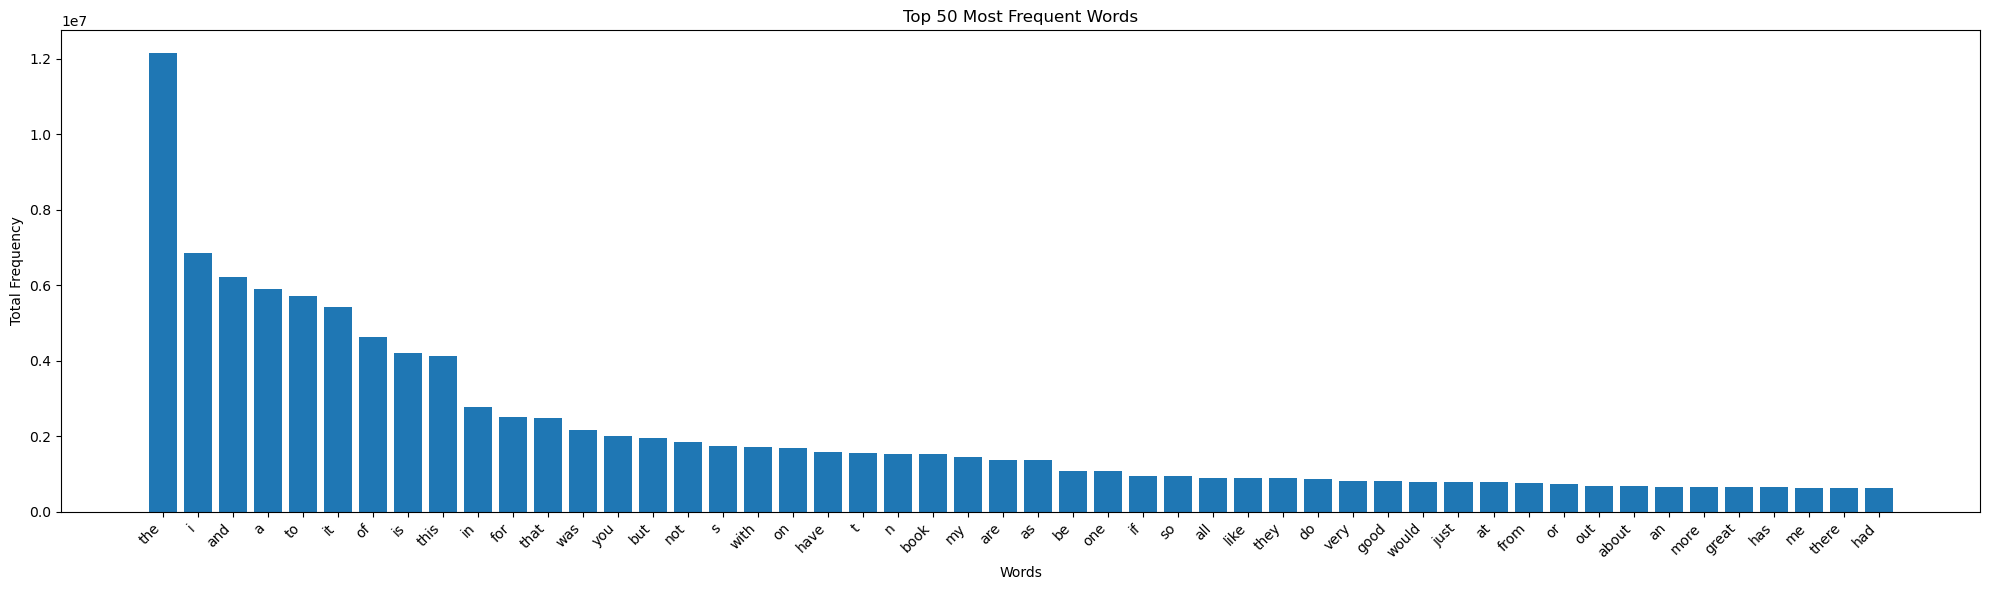

In [60]:
word_counts = Counter(all_words)
top_n = 50  # Adjust as needed
most_common_words = word_counts.most_common(top_n)

top_words, top_counts = zip(*most_common_words)

plt.figure(figsize=(20, 6))
plt.bar(top_words, top_counts)
plt.xlabel('Words')
plt.ylabel('Total Frequency')
plt.title(f'Top {top_n} Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# similarly do for idividual rating